<a href="https://colab.research.google.com/github/AndresG2412/Portafolio/blob/main/CNN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Convolutional Neural Network on the MNIST Dataset
This is a notebook that builds and trains a simple CNN on the ever so popular [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). The MNIST dataset is a large collection of handwritten digits like this sample of the number 8.

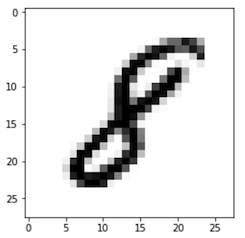

Our mission - we have no choice but to accept it - is to fit a basic CNN on the data and get a good testing accuracy.

We start off by **importing the necessary libraries**

In [1]:
# # Uninstall the current version of TensorFlow.
# !pip uninstall tensorflow 2.13.0

# # Install TensorFlow 1.15.0.
# !pip install tensorflow==2.12.0

# # Verify the TensorFlow version.
# import tensorflow as tf
# print(tf.__version__)


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pickle #pickle is a library that helps us save a lot of different types of data - anything ranging from Pandas dataframes to TensorFlow models

**Formatting Data**

Next, we're going to format our data. Data formatting is a tedious but crucial part of deep learning. It is necessary to format your inputs in a way that will be easy to understand for the model you are trying to train. We have formatted the data for you but in the future, you will have to pay close attention to what the dataset contains and what your model actually needs.

In [3]:
input_shape = (28, 28, 1)
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

**Designing Our Model**

Next, lets design our CNN. We use Sequential from Keras to help design our model. The Sequential type of a model lets us add layers one by one in a linear fashion. Our first layer has to be our input layer.

In [4]:
#primer modelo en funcionamiento
model = Sequential()

#primera capa convolucional con 28 filtros con kernel 3x3
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))# Input layer

#reduce el tamaño de las imagenes
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#MLP del modelo
model.add(Dense(128, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))

#segunda capa convolucional con 70 filtros
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))#tercer modelo en funcionamiento

#capa de salida con 10 posibles resultados de numeros
model.add(Dense(10,activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 60s 31ms/step - loss: 0.4768 - accuracy: 0.8587
Epoch 2/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2222 - accuracy: 0.9387


In [6]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0906 - accuracy: 0.9726

Test accuracy: 0.972599983215332


In [7]:
# prompt: sacar la matriz de confusión

import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo
y_pred = model.predict(test_data)

# Obtener la matriz de confusión
cm = confusion_matrix(test_labels, np.argmax(y_pred, axis=1))

# Imprimir la matriz de confusión
print(cm)

[[ 964    0    3    1    0    1    8    2    0    1]
 [   0 1121    2    4    1    1    4    1    1    0]
 [   6    1  994    4    5    0    3   11    8    0]
 [   0    0    5  996    0    3    0    3    2    1]
 [   0    0    2    0  965    0    6    0    2    7]
 [   3    1    1   11    0  854   19    1    0    2]
 [   4    2    0    0    7    2  941    0    2    0]
 [   1    2   12    6    2    1    0  999    0    5]
 [   4    0    5   10    5    5    3    4  931    7]
 [   8    1    1   10    9    6    0    4    9  961]]


In [8]:
# Calcular la sensibilidad
verdaderos_positivos = cm[1, 1]  # verdaderos positivos están en la posición [1, 1]
falsos_negativos = cm[1, 0]  # falsos negativos están en la posición [1, 0]

sensibilidad_por_clase = []

for i in range(10):  # Iterar sobre las 10 clases
    verdaderos_positivos_clase_i = cm[i, i]
    falsos_negativos_clase_i = np.sum(cm[i, :]) - verdaderos_positivos_clase_i  # Suma de la fila menos los verdaderos positivos
    sensibilidad_clase_i = verdaderos_positivos_clase_i / (verdaderos_positivos_clase_i + falsos_negativos_clase_i)
    sensibilidad_por_clase.append(sensibilidad_clase_i)

for clase, sensibilidad in enumerate(sensibilidad_por_clase):
    print(f"Sensibilidad Clase {clase}: {sensibilidad}")

sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
print("")
print("Sensibilidad Total:", sensibilidad)


Sensibilidad Clase 0: 0.9836734693877551
Sensibilidad Clase 1: 0.9876651982378855
Sensibilidad Clase 2: 0.9631782945736435
Sensibilidad Clase 3: 0.9861386138613861
Sensibilidad Clase 4: 0.9826883910386965
Sensibilidad Clase 5: 0.9573991031390134
Sensibilidad Clase 6: 0.9822546972860126
Sensibilidad Clase 7: 0.9717898832684825
Sensibilidad Clase 8: 0.9558521560574949
Sensibilidad Clase 9: 0.9524281466798811

Sensibilidad Total: 1.0


In [9]:
precision_por_clase = []
total_verdaderos_positivos = 0
total_falsos_positivos = 0

for i in range(10):  # Iterar sobre las 10 clases
    verdaderos_positivos_clase_i = cm[i, i]
    falsos_positivos_clase_i = np.sum(cm[:, i]) - verdaderos_positivos_clase_i  # Suma de la columna menos los verdaderos positivos
    total_verdaderos_positivos += verdaderos_positivos_clase_i
    total_falsos_positivos += falsos_positivos_clase_i
    precision_clase_i = verdaderos_positivos_clase_i / (verdaderos_positivos_clase_i + falsos_positivos_clase_i)
    precision_por_clase.append(precision_clase_i)

precision_total = total_verdaderos_positivos / (total_verdaderos_positivos + total_falsos_positivos)

for clase, precision in enumerate(precision_por_clase):
    print(f"Precisión Clase {clase}: {precision}")
print("")

print(f"Precisión Total: {precision_total}")

Precisión Clase 0: 0.9737373737373738
Precisión Clase 1: 0.9937943262411347
Precisión Clase 2: 0.9697560975609756
Precisión Clase 3: 0.9558541266794626
Precisión Clase 4: 0.9708249496981891
Precisión Clase 5: 0.9782359679266895
Precisión Clase 6: 0.9563008130081301
Precisión Clase 7: 0.9746341463414634
Precisión Clase 8: 0.974869109947644
Precisión Clase 9: 0.9766260162601627

Precisión Total: 0.9726


AUC Clase 0: 1.00
AUC Clase 1: 1.00
AUC Clase 2: 1.00
AUC Clase 3: 1.00
AUC Clase 4: 1.00
AUC Clase 5: 1.00
AUC Clase 6: 1.00
AUC Clase 7: 1.00
AUC Clase 8: 1.00
AUC Clase 9: 1.00


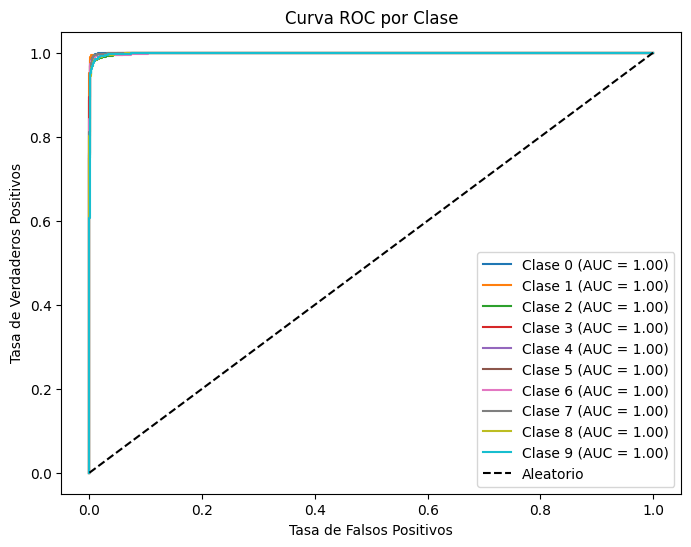

In [10]:
from sklearn.metrics import roc_curve, auc

import math
from matplotlib import pyplot as plt
import seaborn as sns

# Calcular la Curva ROC y el AUC por clase
fpr_por_clase = []
tpr_por_clase = []
auc_por_clase = []

for i in range(10):  # Iterar sobre las 10 clases
    fpr, tpr, _ = roc_curve(test_labels == i, y_pred[:, i])
    auc_clase = auc(fpr, tpr)
    fpr_por_clase.append(fpr)
    tpr_por_clase.append(tpr)
    auc_por_clase.append(auc_clase)
    print(f'AUC Clase {i}: {auc_clase:.2f}')

# Plotear la Curva ROC por clase
plt.figure(figsize=(8, 6))

for i in range(10):  # Iterar sobre las 10 clases
    plt.plot(fpr_por_clase[i], tpr_por_clase[i], label=f'Clase {i} (AUC = {auc_por_clase[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()


# **Nuevo modelo con mas capas de colvolucion**

In [11]:
#segundo modelo en funcionamiento
model = Sequential()

#primera capa convolucional con 28 filtros con kernel 3x3
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))# Input layer

#reduce el tamaño de las imagenes
model.add(MaxPooling2D(pool_size=(2, 2)))

#----------------------------------------------
model.add(Conv2D(56, kernel_size=(3,3)))

# Capa de max pooling para reducir el tamaño de las imágenes
model.add(MaxPooling2D(pool_size=(2, 2)))

# Tercera capa convolucional con 112 filtros y un kernel de tamaño 3x3
model.add(Conv2D(112, kernel_size=(3,3)))

# Capa de max pooling para reducir el tamaño de las imágenes
model.add(MaxPooling2D(pool_size=(2, 2)))
#------------------------------------------

model.add(Flatten())

#MLP del modelo
model.add(Dense(128, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))

#segunda capa convolucional con 70 filtros
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))#tercer modelo en funcionamiento

#capa de salida con 10 posibles resultados de numeros
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3957 - accuracy: 0.8813
Epoch 2/2
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1526 - accuracy: 0.9613


In [13]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0768 - accuracy: 0.9788

Test accuracy: 0.9787999987602234


In [14]:
# prompt: sacar la matriz de confusión

import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo
y_pred = model.predict(test_data)

# Obtener la matriz de confusión
cm = confusion_matrix(test_labels, np.argmax(y_pred, axis=1))

# Imprimir la matriz de confusión
print(cm)

[[ 966    0    1    0    1    1    5    1    4    1]
 [   0 1115    2    2    0    5    7    2    2    0]
 [   2    1 1002    3    3    0    2   15    3    1]
 [   0    0    6  984    0   10    0    6    3    1]
 [   1    0    1    0  961    1    9    1    2    6]
 [   2    0    0    4    0  880    4    1    1    0]
 [   3    1    0    0    1    2  951    0    0    0]
 [   0    2   10    1    0    1    0 1010    1    3]
 [   0    1    2    0    1    0    6    1  961    2]
 [   4    0    0    0   10   18    0    6   13  958]]


In [15]:
# Calcular la sensibilidad
verdaderos_positivos = cm[1, 1]  # verdaderos positivos están en la posición [1, 1]
falsos_negativos = cm[1, 0]  # falsos negativos están en la posición [1, 0]

sensibilidad_por_clase = []

for i in range(10):  # Iterar sobre las 10 clases
    verdaderos_positivos_clase_i = cm[i, i]
    falsos_negativos_clase_i = np.sum(cm[i, :]) - verdaderos_positivos_clase_i  # Suma de la fila menos los verdaderos positivos
    sensibilidad_clase_i = verdaderos_positivos_clase_i / (verdaderos_positivos_clase_i + falsos_negativos_clase_i)
    sensibilidad_por_clase.append(sensibilidad_clase_i)

for clase, sensibilidad in enumerate(sensibilidad_por_clase):
    print(f"Sensibilidad Clase {clase}: {sensibilidad}")

sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
print("")
print("Sensibilidad Total:", sensibilidad)


Sensibilidad Clase 0: 0.9857142857142858
Sensibilidad Clase 1: 0.9823788546255506
Sensibilidad Clase 2: 0.9709302325581395
Sensibilidad Clase 3: 0.9742574257425742
Sensibilidad Clase 4: 0.9786150712830958
Sensibilidad Clase 5: 0.9865470852017937
Sensibilidad Clase 6: 0.9926931106471816
Sensibilidad Clase 7: 0.9824902723735408
Sensibilidad Clase 8: 0.9866529774127311
Sensibilidad Clase 9: 0.9494549058473737

Sensibilidad Total: 1.0


In [16]:
precision_por_clase = []
total_verdaderos_positivos = 0
total_falsos_positivos = 0

for i in range(10):  # Iterar sobre las 10 clases
    verdaderos_positivos_clase_i = cm[i, i]
    falsos_positivos_clase_i = np.sum(cm[:, i]) - verdaderos_positivos_clase_i  # Suma de la columna menos los verdaderos positivos
    total_verdaderos_positivos += verdaderos_positivos_clase_i
    total_falsos_positivos += falsos_positivos_clase_i
    precision_clase_i = verdaderos_positivos_clase_i / (verdaderos_positivos_clase_i + falsos_positivos_clase_i)
    precision_por_clase.append(precision_clase_i)

precision_total = total_verdaderos_positivos / (total_verdaderos_positivos + total_falsos_positivos)

for clase, precision in enumerate(precision_por_clase):
    print(f"Precisión Clase {clase}: {precision}")
print("")

print(f"Precisión Total: {precision_total}")

Precisión Clase 0: 0.9877300613496932
Precisión Clase 1: 0.9955357142857143
Precisión Clase 2: 0.978515625
Precisión Clase 3: 0.9899396378269618
Precisión Clase 4: 0.9836233367451381
Precisión Clase 5: 0.9586056644880174
Precisión Clase 6: 0.9664634146341463
Precisión Clase 7: 0.9683604985618408
Precisión Clase 8: 0.9707070707070707
Precisión Clase 9: 0.98559670781893

Precisión Total: 0.9788


AUC Clase 0: 1.00
AUC Clase 1: 1.00
AUC Clase 2: 1.00
AUC Clase 3: 1.00
AUC Clase 4: 1.00
AUC Clase 5: 1.00
AUC Clase 6: 1.00
AUC Clase 7: 1.00
AUC Clase 8: 1.00
AUC Clase 9: 1.00


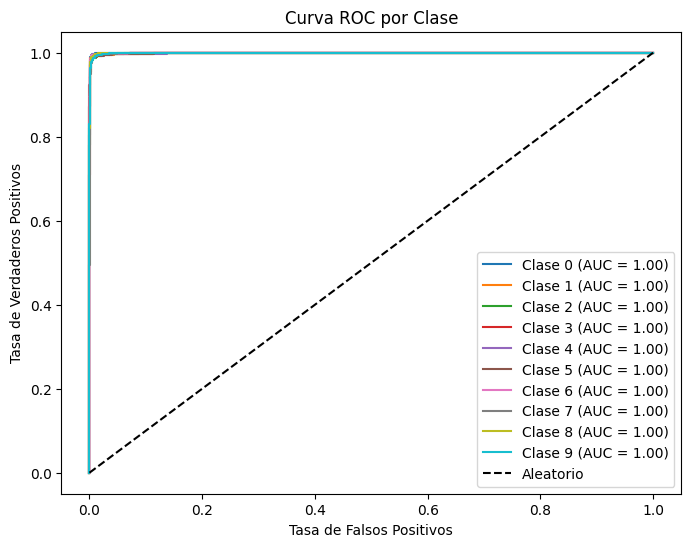

In [17]:
from sklearn.metrics import roc_curve, auc

import math
from matplotlib import pyplot as plt
import seaborn as sns

# Calcular la Curva ROC y el AUC por clase
fpr_por_clase = []
tpr_por_clase = []
auc_por_clase = []

for i in range(10):  # Iterar sobre las 10 clases
    fpr, tpr, _ = roc_curve(test_labels == i, y_pred[:, i])
    auc_clase = auc(fpr, tpr)
    fpr_por_clase.append(fpr)
    tpr_por_clase.append(tpr)
    auc_por_clase.append(auc_clase)
    print(f'AUC Clase {i}: {auc_clase:.2f}')

# Plotear la Curva ROC por clase
plt.figure(figsize=(8, 6))

for i in range(10):  # Iterar sobre las 10 clases
    plt.plot(fpr_por_clase[i], tpr_por_clase[i], label=f'Clase {i} (AUC = {auc_por_clase[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()


In [18]:
#tercer modelo en funcionamiento
model = Sequential()

#primera capa convolucional con 28 filtros con kernel 3x3
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))# Input layer

#reduce el tamaño de las imagenes
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#MLP del modelo
model.add(Dense(128, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))

#segunda capa convolucional con 70 filtros
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))

#---------------------------------------------
#segunda capa convolucional con 70 filtros
model.add(Dense(30, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))

#segunda capa convolucional con 70 filtros
model.add(Dense(10, activation=tf.nn.relu, use_bias=True))

#prevenir el sobreajuste, desactiva aleatoreamente el 50% de las neuronas en el entrenamiento
model.add(Dropout(0.5))
#---------------------------------------------

#capa de salida con 10 posibles resultados de numeros
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 39s 20ms/step - loss: 1.5852 - accuracy: 0.4369
Epoch 2/2
1875/1875 [==============================] - 38s 20ms/step - loss: 1.1665 - accuracy: 0.6064


In [20]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.7429 - accuracy: 0.8128

Test accuracy: 0.8127999901771545


In [21]:
# prompt: sacar la matriz de confusión

import numpy as np
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo
y_pred = model.predict(test_data)

# Obtener la matriz de confusión
cm = confusion_matrix(test_labels, np.argmax(y_pred, axis=1))

# Imprimir la matriz de confusión
print(cm)

[[ 966    0    1    0    2    2    5    2    1    1]
 [   0 1112    3    0    0    4    2    0   14    0]
 [   6    0  648   84   38  213    7    2   24   10]
 [   1    0  657  187   11  126    0    1   13   14]
 [   2    0    0    0  935    1    6    0    7   31]
 [   8    0   11    0   54  743    8    1   58    9]
 [  17    2    0    0   22   14  897    0    6    0]
 [   0    3    5    0   21    8    0  865    4  122]
 [  14    4    2    0   32   34    1    2  876    9]
 [   5    1    0    0   68   11    2   15    8  899]]


In [22]:
# Calcular la sensibilidad
verdaderos_positivos = cm[1, 1]  # verdaderos positivos están en la posición [1, 1]
falsos_negativos = cm[1, 0]  # falsos negativos están en la posición [1, 0]

sensibilidad_por_clase = []

for i in range(10):  # Iterar sobre las 10 clases
    verdaderos_positivos_clase_i = cm[i, i]
    falsos_negativos_clase_i = np.sum(cm[i, :]) - verdaderos_positivos_clase_i  # Suma de la fila menos los verdaderos positivos
    sensibilidad_clase_i = verdaderos_positivos_clase_i / (verdaderos_positivos_clase_i + falsos_negativos_clase_i)
    sensibilidad_por_clase.append(sensibilidad_clase_i)

for clase, sensibilidad in enumerate(sensibilidad_por_clase):
    print(f"Sensibilidad Clase {clase}: {sensibilidad}")

sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
print("")
print("Sensibilidad Total:", sensibilidad)


Sensibilidad Clase 0: 0.9857142857142858
Sensibilidad Clase 1: 0.9797356828193833
Sensibilidad Clase 2: 0.627906976744186
Sensibilidad Clase 3: 0.18514851485148515
Sensibilidad Clase 4: 0.9521384928716904
Sensibilidad Clase 5: 0.8329596412556054
Sensibilidad Clase 6: 0.9363256784968684
Sensibilidad Clase 7: 0.8414396887159533
Sensibilidad Clase 8: 0.8993839835728953
Sensibilidad Clase 9: 0.8909811694747275

Sensibilidad Total: 1.0


In [23]:
precision_por_clase = []
total_verdaderos_positivos = 0
total_falsos_positivos = 0

for i in range(10):  # Iterar sobre las 10 clases
    verdaderos_positivos_clase_i = cm[i, i]
    falsos_positivos_clase_i = np.sum(cm[:, i]) - verdaderos_positivos_clase_i  # Suma de la columna menos los verdaderos positivos
    total_verdaderos_positivos += verdaderos_positivos_clase_i
    total_falsos_positivos += falsos_positivos_clase_i
    precision_clase_i = verdaderos_positivos_clase_i / (verdaderos_positivos_clase_i + falsos_positivos_clase_i)
    precision_por_clase.append(precision_clase_i)

precision_total = total_verdaderos_positivos / (total_verdaderos_positivos + total_falsos_positivos)

for clase, precision in enumerate(precision_por_clase):
    print(f"Precisión Clase {clase}: {precision}")
print("")

print(f"Precisión Total: {precision_total}")


Precisión Clase 0: 0.9479882237487733
Precisión Clase 1: 0.9910873440285205
Precisión Clase 2: 0.4883195177091183
Precisión Clase 3: 0.6900369003690037
Precisión Clase 4: 0.790363482671175
Precisión Clase 5: 0.6427335640138409
Precisión Clase 6: 0.9665948275862069
Precisión Clase 7: 0.9740990990990991
Precisión Clase 8: 0.8664688427299704
Precisión Clase 9: 0.8210045662100457

Precisión Total: 0.8128


AUC Clase 0: 1.00
AUC Clase 1: 1.00
AUC Clase 2: 0.91
AUC Clase 3: 0.94
AUC Clase 4: 0.99
AUC Clase 5: 0.94
AUC Clase 6: 0.99
AUC Clase 7: 0.98
AUC Clase 8: 0.98
AUC Clase 9: 0.98


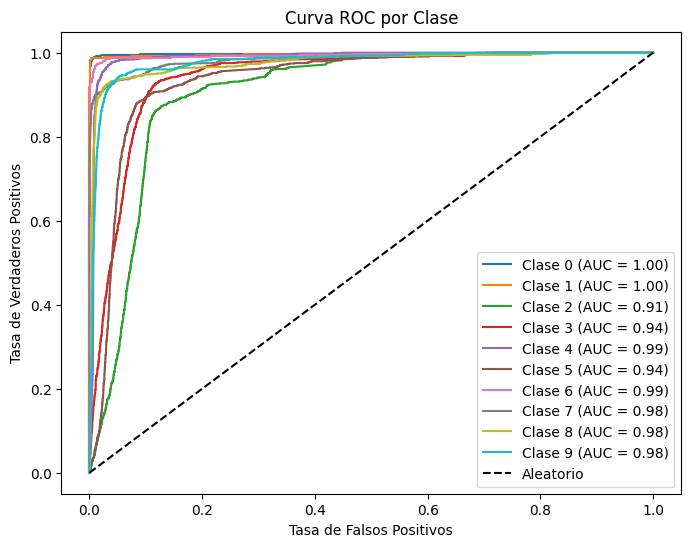

In [24]:
from sklearn.metrics import roc_curve, auc

import math
from matplotlib import pyplot as plt
import seaborn as sns

# Calcular la Curva ROC y el AUC por clase
fpr_por_clase = []
tpr_por_clase = []
auc_por_clase = []

for i in range(10):  # Iterar sobre las 10 clases
    fpr, tpr, _ = roc_curve(test_labels == i, y_pred[:, i])
    auc_clase = auc(fpr, tpr)
    fpr_por_clase.append(fpr)
    tpr_por_clase.append(tpr)
    auc_por_clase.append(auc_clase)
    print(f'AUC Clase {i}: {auc_clase:.2f}')

# Plotear la Curva ROC por clase
plt.figure(figsize=(8, 6))

for i in range(10):  # Iterar sobre las 10 clases
    plt.plot(fpr_por_clase[i], tpr_por_clase[i], label=f'Clase {i} (AUC = {auc_por_clase[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()


# **Dropout**

Es una estrategia utilizada en el entrenamiento de una Red Neuronal Convolucional, la cual lo que hace es desactivar (aleatoriamente) un procentaje de neuronas (el cual indicaremos) del modelo, para que asi las que queden activas se entrenen de mejor forma, robusteciendolas y haciendo su testeo mejor y eficiente

# **Capas convolucionales predefinidas en el codigo: 3**

```
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
```
> 28 filtros, kernel de 3x3

```
model.add(Dense(128, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 128 neuronas

```
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 70 neuronas

# **Capas convolucionales añadidas al codigo: 2**

```
model.add(Conv2D(56, kernel_size=(3,3)))
```
> 56 filtros, kernel de 3x3

```
model.add(Conv2D(112, kernel_size=(3,3)))
```
> 112 filtros, kernel de 3x3
# **Capas predefinidas en el codigo: 3**
```
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
```
> 28 filtros, kernel de 3x3

```
model.add(Dense(128, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 128 neuronas

```
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 70 neuronas

# **Capas convolucionales añadidas al codigo: 2**
```
model.add(Dense(30, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 30 neuronas

```
model.add(Dense(10, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 10 neuronas
# **Capas predefinidas en el codigo: 3**
```
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
```
> 28 filtros, kernel de 3x3

```
model.add(Dense(128, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 128 neuronas

```
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))
```
> capa MLP con 70 neuronas